In [265]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error
from sklearn import preprocessing

import itertools

In [266]:
df = pd.read_csv("dataset.csv")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df.shape

(5644, 111)

In [268]:
np.array(df.isnull().sum())

array([   0,    0,    0,    0,    0,    0, 5041, 5041, 5042, 5045, 5042,
       5042, 5042, 5042, 5042, 5042, 5042, 5042, 5043, 5042, 5436, 4290,
       4290, 4290, 4292, 4292, 4292, 5644, 4292, 4292, 4292, 4292, 4292,
       4292, 4292, 4292, 4292, 4292, 4292, 5131, 5247, 5138, 5220, 5273,
       5274, 4824, 4824, 5419, 5418, 5491, 5462, 5462, 5462, 5500, 5594,
       5312, 5604, 5508, 5508, 5508, 5508, 5643, 5508, 5508, 5508, 5547,
       5547, 5547, 5547, 5547, 5547, 5584, 5574, 5574, 5574, 5574, 5587,
       5643, 5574, 5575, 5584, 5644, 5574, 5574, 5574, 5577, 5575, 5574,
       5574, 5644, 5553, 5511, 5543, 5644, 5641, 5540, 5621, 5617, 5636,
       5644, 5631, 5617, 5617, 5617, 5617, 5617, 5617, 5617, 5624, 5624,
       5617])

In [269]:
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})
df = df.replace({'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0})
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.901134
1    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [393]:
df_null_pct = df.isna().mean().round(4)*100
print(df_null_pct)
# df_null_pct.sort_values(ascending=False)

Patient ID                                                0.00
Patient age quantile                                      0.00
SARS-Cov-2 exam result                                    0.00
Patient addmited to regular ward (1=yes, 0=no)            0.00
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.00
Patient addmited to intensive care unit (1=yes, 0=no)     0.00
Hematocrit                                               89.32
Hemoglobin                                               89.32
Platelets                                                89.33
Mean platelet volume                                     89.39
Red blood Cells                                          89.33
Lymphocytes                                              89.33
Mean corpuscular hemoglobin concentration (MCHC)         89.33
Leukocytes                                               89.33
Basophils                                                89.33
Mean corpuscular hemoglobin (MCH)                      

<AxesSubplot:ylabel='Frequency'>

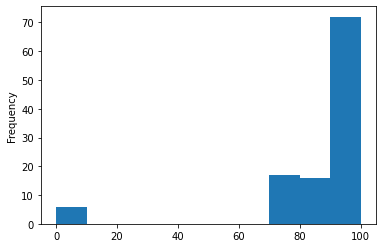

In [271]:
df_null_pct.plot(kind='hist')

In [392]:
df_null_pct > 90

Patient_age_quantile                              False
SARS_Cov_2_exam_result                            False
Patient_addmited_to_regular_ward                  False
Patient_addmited_to_semi_intensive_unit           False
Patient_addmited_to_intensive_care_unit           False
Hematocrit                                        False
Hemoglobin                                        False
Platelets                                         False
Mean_platelet_volume                              False
Red_blood_Cells                                   False
Lymphocytes                                       False
Mean_corpuscular_hemoglobin_concentration_MCHC    False
Leukocytes                                        False
Basophils                                         False
Mean_corpuscular_hemoglobin_MCH                   False
Eosinophils                                       False
Mean_corpuscular_volume_MCV                       False
Monocytes                                       

In [272]:
nulls = df_null_pct[df_null_pct > 90]  #移除>90％空值的欄位
df = df[[col for col in df.columns if col not in nulls]]
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [273]:
features = [col for col in df.columns if col not in ['Patient ID', 
                                                    'Patient addmited to regular ward (1=yes, 0=no)',
                                                    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                    'Patient addmited to intensive care unit (1=yes, 0=no)',
                                                    'SARS-Cov-2 exam result']]

# pd.set_option('display.max_rows', df[features].shape[0]+1)
print(df[features].var())

Patient age quantile                                33.384166
Hematocrit                                           1.001661
Hemoglobin                                           1.001661
Platelets                                            1.001664
Mean platelet volume                                 1.001672
Red blood Cells                                      1.001664
Lymphocytes                                          1.001664
Mean corpuscular hemoglobin concentration (MCHC)     1.001664
Leukocytes                                           1.001664
Basophils                                            1.001664
Mean corpuscular hemoglobin (MCH)                    1.001664
Eosinophils                                          1.001664
Mean corpuscular volume (MCV)                        1.001664
Monocytes                                            1.001667
Red blood cell distribution width (RDW)              1.001664
Respiratory Syncytial Virus                          0.036957
Influenz

In [274]:
# 因為Parainfluenza 2 變異數是0，沒有價值故刪除
df.drop('Parainfluenza 2', axis=1, inplace=True)
features.remove('Parainfluenza 2')

In [275]:
df['detected'] = df[df.columns[20:]].sum(axis=1)


In [276]:
df.loc[df['detected']>1, 'detected'] = 1
df['detected'].value_counts(normalize=True)

0.0    0.865344
1.0    0.134656
Name: detected, dtype: float64

In [277]:
df[df['detected']==1].iloc[:,2].value_counts(normalize=True) # 與paper的結論一致，感染了其他疾病的人，通常感染covid的可能性很低

0    0.981579
1    0.018421
Name: SARS-Cov-2 exam result, dtype: float64

In [278]:
print(df[df['detected']==0].iloc[:,2].value_counts(normalize=True)) #沒有檢測出其他疾病的人，檢測出covid的機率跟整個資料集的檢測分布一樣
print(df.iloc[:,2].value_counts(normalize=True))

0    0.888616
1    0.111384
Name: SARS-Cov-2 exam result, dtype: float64
0    0.901134
1    0.098866
Name: SARS-Cov-2 exam result, dtype: float64


In [279]:
df_clean = df.copy()

df[df.columns[20:]] = df[df.columns[20:]].fillna(0)

In [280]:
df_null_pct = df.isna().mean().round(4)*100
df_null_pct.sort_values(ascending=False)

Mean platelet volume                                     89.39
Monocytes                                                89.35
Red blood cell distribution width (RDW)                  89.33
Eosinophils                                              89.33
Mean corpuscular hemoglobin (MCH)                        89.33
Basophils                                                89.33
Leukocytes                                               89.33
Mean corpuscular hemoglobin concentration (MCHC)         89.33
Lymphocytes                                              89.33
Red blood Cells                                          89.33
Platelets                                                89.33
Mean corpuscular volume (MCV)                            89.33
Hemoglobin                                               89.32
Hematocrit                                               89.32
Patient addmited to intensive care unit (1=yes, 0=no)     0.00
Patient addmited to semi-intensive unit (1=yes, 0=no)  

<AxesSubplot:>

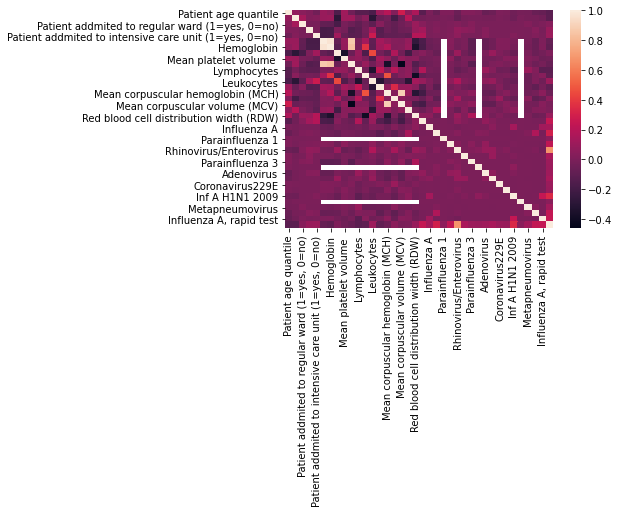

In [281]:
sns.heatmap(df.corr())

## imputation(using missForest(R))

In [282]:
df.to_csv(r'dataset_has_null.csv', index = False)

In [283]:
df_deal = pd.read_csv("done_data.csv")

In [284]:
# list(df.columns)

In [285]:
colNames = [
 'Patient_age_quantile',
 'SARS_Cov_2_exam_result',
 'Patient_addmited_to_regular_ward',
 'Patient_addmited_to_semi_intensive_unit',
 'Patient_addmited_to_intensive_care_unit',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean_platelet_volume',
 'Red_blood_Cells',
 'Lymphocytes',
 'Mean_corpuscular_hemoglobin_concentration_MCHC',
 'Leukocytes',
 'Basophils',
 'Mean_corpuscular_hemoglobin_MCH',
 'Eosinophils',
 'Mean_corpuscular_volume_MCV',
 'Monocytes',
 'Red_blood_cell_distribution_width_RDW',
 'Respiratory_Syncytial_Virus',
 'Influenza_A',
 'Influenza_B',
 'Parainfluenza_1',
 'CoronavirusNL63',
 'Rhinovirus_Enterovirus',
 'Coronavirus_HKU1',
 'Parainfluenza_3',
 'Chlamydophila_pneumoniae',
 'Adenovirus',
 'Parainfluenza_4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf_A_H1N1_2009',
 'Bordetella_pertussis',
 'Metapneumovirus',
 'Influenza_B_rapid_test',
 'Influenza_A_rapid_test',
 'detected']

In [286]:
df_deal.columns = colNames
df_deal

,Patient_age_quantile,SARS_Cov_2_exam_result,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,...,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Influenza_B_rapid_test,Influenza_A_rapid_test,detected
0,13,0,0,0,0,0.289773,0.304936,0.115823,-0.029180,0.095453,...,0,0,0,0,0,0,0,0,0,0
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0,0,0,0,0,0,0,0,0,1
2,8,0,0,0,0,0.250851,0.280500,0.073719,-0.000680,0.086184,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0.349242,0.403851,0.059978,0.258138,0.141984,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0.265701,0.276623,0.001539,-0.258707,0.147333,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,0.004787,-0.015490,-0.399744,0.128015,0.018949,...,0,0,0,0,0,0,0,0,0,0
5640,17,0,0,0,0,0.235905,0.248018,-0.076280,0.133726,0.038534,...,0,0,0,0,0,0,0,0,0,0
5641,4,0,0,0,0,0.206909,0.290798,0.128370,0.061719,0.087939,...,0,0,0,0,0,0,0,0,0,0
5642,10,0,0,0,0,0.265820,0.281649,0.097968,-0.033496,0.074263,...,0,0,0,0,0,0,0,0,0,0


In [287]:
df_null_pct = df_deal.isna().mean().round(4)*100
df_null_pct.sort_values(ascending=False)

detected                                          0.0
Red_blood_Cells                                   0.0
Mean_corpuscular_volume_MCV                       0.0
Eosinophils                                       0.0
Mean_corpuscular_hemoglobin_MCH                   0.0
Basophils                                         0.0
Leukocytes                                        0.0
Mean_corpuscular_hemoglobin_concentration_MCHC    0.0
Lymphocytes                                       0.0
Mean_platelet_volume                              0.0
Influenza_A_rapid_test                            0.0
Platelets                                         0.0
Hemoglobin                                        0.0
Hematocrit                                        0.0
Patient_addmited_to_intensive_care_unit           0.0
Patient_addmited_to_semi_intensive_unit           0.0
Patient_addmited_to_regular_ward                  0.0
SARS_Cov_2_exam_result                            0.0
Monocytes                   

## **Standardization**

In [288]:
df_deal_X = df_deal.drop('SARS_Cov_2_exam_result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_deal_X, df_deal['SARS_Cov_2_exam_result'], test_size=0.2, random_state=1)

In [289]:
print(y_test[y_test.isna()])
scaler = preprocessing.StandardScaler().fit(X_train)

Series([], Name: SARS_Cov_2_exam_result, dtype: int64)


In [290]:
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_scaled).isna()
pd.DataFrame(X_train).isna()

,Patient_age_quantile,Patient_addmited_to_regular_ward,Patient_addmited_to_semi_intensive_unit,Patient_addmited_to_intensive_care_unit,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume,Red_blood_Cells,Lymphocytes,...,Adenovirus,Parainfluenza_4,Coronavirus229E,CoronavirusOC43,Inf_A_H1N1_2009,Bordetella_pertussis,Metapneumovirus,Influenza_B_rapid_test,Influenza_A_rapid_test,detected
2045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2719,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3108,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
322,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3980,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [291]:
X_scaled.mean(axis=0)

array([-3.14747613e-18, -6.29495225e-18,  2.51798090e-17, -1.49505116e-17,
        1.57373806e-18, -4.24909277e-17,  7.47525580e-18, -1.45570771e-17,
       -1.25899045e-17,  9.12768077e-17,  1.10161664e-17, -4.72121419e-17,
       -1.57373806e-17, -6.29495225e-18,  6.29495225e-18, -6.29495225e-18,
       -7.08182129e-18,  2.51798090e-17,  1.88848568e-17, -8.65555935e-18,
        6.29495225e-18, -1.25899045e-17, -2.36060710e-18, -2.83272851e-17,
        1.80979877e-17, -3.14747613e-18, -9.83586290e-18,  1.33767735e-17,
       -7.86869032e-19,  0.00000000e+00, -7.86869032e-19,  2.83272851e-17,
       -1.57373806e-18, -6.29495225e-18, -7.86869032e-18, -2.59666781e-17,
       -3.46222374e-17])

In [292]:
# scaled_data = pd.concat([X_scaled, y_train], 1)

# dd =pd.concat([pd.DataFrame(X_test_scaled), y_test], 1)

scaled = pd.DataFrame(X_scaled)
scaled[37] = list(y_train)
scaled

test_scaled = pd.DataFrame(X_test_scaled)
test_scaled[37] = list(y_test)
test_scaled
scaled =  pd.concat([scaled, test_scaled],0)
scaled.columns = [
 'Patient_age_quantile',
 'Patient_addmited_to_regular_ward',
 'Patient_addmited_to_semi_intensive_unit',
 'Patient_addmited_to_intensive_care_unit',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean_platelet_volume',
 'Red_blood_Cells',
 'Lymphocytes',
 'Mean_corpuscular_hemoglobin_concentration_MCHC',
 'Leukocytes',
 'Basophils',
 'Mean_corpuscular_hemoglobin_MCH',
 'Eosinophils',
 'Mean_corpuscular_volume_MCV',
 'Monocytes',
 'Red_blood_cell_distribution_width_RDW',
 'Respiratory_Syncytial_Virus',
 'Influenza_A',
 'Influenza_B',
 'Parainfluenza_1',
 'CoronavirusNL63',
 'Rhinovirus_Enterovirus',
 'Coronavirus_HKU1',
 'Parainfluenza_3',
 'Chlamydophila_pneumoniae',
 'Adenovirus',
 'Parainfluenza_4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf_A_H1N1_2009',
 'Bordetella_pertussis',
 'Metapneumovirus',
 'Influenza_B_rapid_test',
 'Influenza_A_rapid_test',
 'detected',
 'SARS_Cov_2_exam_result']


## **Forward selection**

In [293]:
X_scaled

array([[-0.04257601, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [-1.07792984, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [ 0.82021884, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       ...,
       [-0.7328119 , -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [ 1.16533679, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [ 0.30254193, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713]])

In [294]:
def processSubset(X_label):
    # Fit model on feature_set and calculate RSS
    X_smf = ' + '.join(X_label)
    f = 'SARS_Cov_2_exam_result ~ {}'.format(X_smf)
    # Fit model
    lin_reg = smf.ols(formula=f, data=scaled).fit()
    RSS = lin_reg.ssr
    return {'model': lin_reg, 'RSS': RSS}

In [295]:
def forward(predictors):
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    return best_model

In [296]:
models = pd.DataFrame(columns=['RSS', 'model'])
predictors = []
for i in range(1, len(X_train.columns)+1):
    models.loc[i] = forward(predictors)
    exog = models.loc[i]['model'].model.exog_names.copy()
    exog.remove('Intercept') #smf will automatically adds intercept
    predictors = exog
    print(i, predictors)

1 ['Platelets']
2 ['Platelets', 'Eosinophils']
3 ['Platelets', 'Eosinophils', 'Leukocytes']
4 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes']
5 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile']
6 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B']
7 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B', 'Basophils']
8 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B', 'Basophils', 'detected']
9 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B', 'Basophils', 'detected', 'Patient_addmited_to_intensive_care_unit']
10 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B', 'Basophils', 'detected', 'Patient_addmited_to_intensive_care_unit', 'Rhinovirus_Enterovirus']
11 ['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile',

In [297]:
aic_f = []

for m in models.model:
    aic_f.append(m.aic)
    
np.array(aic_f).argmin()

24

In [298]:
print(models['model'][24].model.exog_names[1:]) # Do not print Intercept

['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B', 'Basophils', 'detected', 'Patient_addmited_to_intensive_care_unit', 'Rhinovirus_Enterovirus', 'Mean_corpuscular_hemoglobin_MCH', 'Red_blood_cell_distribution_width_RDW', 'Patient_addmited_to_regular_ward', 'Coronavirus229E', 'Mean_corpuscular_volume_MCV', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Mean_platelet_volume', 'Inf_A_H1N1_2009', 'Respiratory_Syncytial_Virus', 'Patient_addmited_to_semi_intensive_unit', 'Influenza_B_rapid_test', 'CoronavirusOC43', 'Coronavirus_HKU1', 'Parainfluenza_4']


## **Backward selection**

In [299]:
def backward(predictors):
    results = []
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    return best_model
models2 = pd.DataFrame(columns=['RSS', 'model'], index = range(1, len(X_train.columns)))



predictors = X_train.columns
models2.loc[len(predictors)] = processSubset(predictors)

while(len(predictors) > 1):
    models2.loc[len(predictors)-1] = backward(predictors)
    exog = models2.loc[len(predictors)-1]['model'].model.exog_names.copy()
    exog.remove('Intercept')
    predictors = exog
    print(len(predictors), predictors)

36 ['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean_platelet_volume', 'Red_blood_Cells', 'Lymphocytes', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_A', 'Influenza_B', 'Parainfluenza_1', 'CoronavirusNL63', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_3', 'Chlamydophila_pneumoniae', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Bordetella_pertussis', 'Metapneumovirus', 'Influenza_B_rapid_test', 'Influenza_A_rapid_test', 'detected']
35 ['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Hematocrit', 

In [300]:
aic_b = []

for m in models2.model:
    aic_b.append(m.aic)

np.array(aic_b).argmin()

24

In [301]:
print(models2['model'][24].model.exog_names[1:])

['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']


## SMOTE(用來處理imbalance data)

In [306]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors=5, random_state=42)
X_scaled, y_train = smt.fit_resample(X_scaled, y_train)

np.bincount(y_train)

array([4064, 4064])

In [303]:
# !pip install imblearn

In [307]:
X_scaled

array([[-0.04257601, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [-1.07792984, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [ 0.82021884, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       ...,
       [ 0.82021884, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [ 0.12998296, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713],
       [ 1.51045473, -0.12273121, -0.09805807, ..., -0.09089894,
        -0.09572909, -0.38808713]])

## Logistic regression

In [322]:
# X_scaled, y_train
# X_test_scaled, y_test
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [323]:
scaled_X = scaled.iloc[:, :-1]
scaled_y = scaled.iloc[:, -1]

In [334]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=100, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.984 (0.017)
AUC: 0.981 (0.045)


In [333]:
# kf = KFold(n_splits=10, shuffle=True, random_state=1)
# train_rmse_ = []
# train_mae_ = []
# val_rmse_ = []
# val_mae_ = []

# for train_index, test_index in kf.split(scaled):
#     X_train, X_test = scaled_X.iloc[train_index], scaled_X.iloc[test_index]
#     y_train, y_test = scaled_y.iloc[train_index], scaled_y.iloc[test_index]
    
    
#     clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#     clf.fit(X_train, y_train)
#     train_predicted = clf.predict(X_train)
#     test_predicted = clf.predict(X_test)
    
#     report = metrics.classification_report(y_test, test_predicted)
#     print(report)
    
    
    
# #     clf.predict(X[:2, :])

# #     clf.predict_proba(X[:2, :])
# #     clf.score(X, y)

    
    
    
    
    
    
    
    
    

# #     train_rmse.append(sqrt(mean_squared_error(X_train, X_proj)))
# #     val_rmse.append(sqrt(mean_squared_error(X_test, X_proj_te)))
# #     train_mae.append(mean_absolute_error(X_train, X_proj))
# #     val_mae.append(mean_absolute_error(X_test, X_proj_te))
# # train_rmse_.append(np.mean(train_rmse))
# # val_rmse_.append(np.mean(val_rmse))
# # train_mae_.append(np.mean(train_mae))
# # val_mae_.append(np.mean(val_mae))
        
# # #  draw error
# # plt.figure(figsize=[15, 8])
# # plt.subplot(2, 2, 1)
# # plt.title("train/val rmse")
# # plt.plot(range(1, 40), train_rmse_, label='train_rmse')
# # plt.plot(range(1, 40), val_rmse_, label='val_rmse')
# # plt.legend()


# # plt.subplot(2, 2, 2)
# # plt.title("train/val mae")
# # plt.plot(range(1, 40), train_mae_, label='train_mae')
# # plt.plot(range(1, 40), val_mae_, label='val_mae')
# # plt.legend()

# # plt.subplot(2, 2, 3)
# # plt.title("Screeplot")
# # plt.plot(np.cumsum(pca.explained_variance_ratio_))  # scree plot
# # plt.xlabel('number of components')
# # plt.ylabel('cumulative explained variance');


# # print(val_rmse_[5])
# # print(val_mae_[5])

## random forest

In [358]:
int(sqrt(scaled.shape[1]))

6

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from numpy import sqrt 
cv = KFold(n_splits=100, random_state=1, shuffle=True)
model = RandomForestClassifier(max_features=6, random_state=1)

scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.988 (0.016)
AUC: 0.998 (0.004)


**forward**

In [395]:
from sklearn.ensemble import RandomForestClassifier
from numpy import sqrt 
cv = KFold(n_splits=100, random_state=1, shuffle=True)
model = RandomForestClassifier(max_features=6, random_state=1)

scores = cross_val_score(model, scaled_X[['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B', 'Basophils', 'detected', 'Patient_addmited_to_intensive_care_unit', 'Rhinovirus_Enterovirus', 'Mean_corpuscular_hemoglobin_MCH', 'Red_blood_cell_distribution_width_RDW', 'Patient_addmited_to_regular_ward', 'Coronavirus229E', 'Mean_corpuscular_volume_MCV', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Mean_platelet_volume', 'Inf_A_H1N1_2009', 'Respiratory_Syncytial_Virus', 'Patient_addmited_to_semi_intensive_unit', 'Influenza_B_rapid_test', 'CoronavirusOC43', 'Coronavirus_HKU1', 'Parainfluenza_4']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Platelets', 'Eosinophils', 'Leukocytes', 'Monocytes', 'Patient_age_quantile', 'Influenza_B', 'Basophils', 'detected', 'Patient_addmited_to_intensive_care_unit', 'Rhinovirus_Enterovirus', 'Mean_corpuscular_hemoglobin_MCH', 'Red_blood_cell_distribution_width_RDW', 'Patient_addmited_to_regular_ward', 'Coronavirus229E', 'Mean_corpuscular_volume_MCV', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Mean_platelet_volume', 'Inf_A_H1N1_2009', 'Respiratory_Syncytial_Virus', 'Patient_addmited_to_semi_intensive_unit', 'Influenza_B_rapid_test', 'CoronavirusOC43', 'Coronavirus_HKU1', 'Parainfluenza_4']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.988 (0.016)
AUC: 0.996 (0.020)


**backward**

In [396]:
from sklearn.ensemble import RandomForestClassifier
from numpy import sqrt 
cv = KFold(n_splits=100, random_state=1, shuffle=True)
model = RandomForestClassifier(max_features=6, random_state=1)

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.988 (0.016)
AUC: 0.996 (0.020)


## Bagging(using SVC)

In [399]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

cv = KFold(n_splits=100, random_state=1, shuffle=True)
model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=1)
    
scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.988 (0.014)
AUC: 0.997 (0.013)


In [401]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

cv = KFold(n_splits=100, random_state=1, shuffle=True)
model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=1)
    
scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.988 (0.014)
AUC: 0.997 (0.012)


## Bagging(using 決策樹)

In [419]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=1) 
scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.982 (0.019)
AUC: 0.954 (0.059)


In [420]:
model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=1) 
scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.985 (0.016)
AUC: 0.959 (0.057)


## Bagging(using 極限隨機樹)

In [421]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(max_depth=None,min_samples_split=2, random_state=1)
scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.991 (0.012)
AUC: 0.998 (0.010)


In [422]:
model = ExtraTreesClassifier(max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.014)
AUC: 0.998 (0.010)


## Knn

In [444]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=8)
scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.986 (0.016)
AUC: 0.991 (0.027)


In [443]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=8)
scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.987 (0.014)
AUC: 0.990 (0.026)


## Adaboost

In [445]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)

scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.984 (0.018)
AUC: 0.992 (0.029)


In [446]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.985 (0.018)
AUC: 0.992 (0.029)


## SVM

In [447]:
model = SVC(random_state=1)
scores = cross_val_score(model, scaled_X, scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X, scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.988 (0.014)
AUC: 0.997 (0.015)


In [449]:
model = SVC(random_state=1)
scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

scores = cross_val_score(model, scaled_X[['Patient_age_quantile', 'Patient_addmited_to_regular_ward', 'Patient_addmited_to_semi_intensive_unit', 'Patient_addmited_to_intensive_care_unit', 'Platelets', 'Mean_platelet_volume', 'Mean_corpuscular_hemoglobin_concentration_MCHC', 'Leukocytes', 'Basophils', 'Mean_corpuscular_hemoglobin_MCH', 'Eosinophils', 'Mean_corpuscular_volume_MCV', 'Monocytes', 'Red_blood_cell_distribution_width_RDW', 'Respiratory_Syncytial_Virus', 'Influenza_B', 'Rhinovirus_Enterovirus', 'Coronavirus_HKU1', 'Parainfluenza_4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf_A_H1N1_2009', 'Influenza_B_rapid_test', 'detected']], scaled_y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.990 (0.014)
AUC: 0.997 (0.013)
